In [5]:
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


**Importing Libraries**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings(action="ignore")

**Working directories**

In [ ]:
input_path1 = '../input/house-prices-advanced-regression-techniques/'
input_path2 = '../input/ames-housing-dataset/'

In [9]:
house_data = pd.read_csv(aliamini93_ames_housing_dataset_path + '/AmesHousing.csv')
test = pd.read_csv(house_prices_advanced_regression_techniques_path + '/test.csv')
data_w = house_data.copy()
data_w.columns = data_w.columns.str.replace(' ', '')
data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   MSSubClass     2930 non-null   int64  
 3   MSZoning       2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

In [10]:
data_w.head()

Order        PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0      1  526301100          20       RL        141.0    31770   Pave   NaN   
1      2  526350040          20       RH         80.0    11622   Pave   NaN   
2      3  526351010          20       RL         81.0    14267   Pave   NaN   
3      4  526353030          20       RL         93.0    11160   Pave   NaN   
4      5  527105010          60       RL         74.0    13830   Pave   NaN   

  LotShape LandContour  ... PoolArea PoolQC  Fence MiscFeature MiscVal MoSold  \
0      IR1         Lvl  ...        0    NaN    NaN         NaN       0      5   
1      Reg         Lvl  ...        0    NaN  MnPrv         NaN       0      6   
2      IR1         Lvl  ...        0    NaN    NaN        Gar2   12500      6   
3      Reg         Lvl  ...        0    NaN    NaN         NaN       0      4   
4      IR1         Lvl  ...        0    NaN  MnPrv         NaN       0      3   

  YrSold SaleType  SaleCondition  SalePrice  
0   2010      WD          Normal     215000  
1   2010      WD          Normal     105000  
2   2010      WD          Normal     172000  
3   2010      WD          Normal     244000  
4   2010      WD          Normal     189900  

[5 rows x 82 columns]

**Getting the main parameters of the Normal Ditribution**

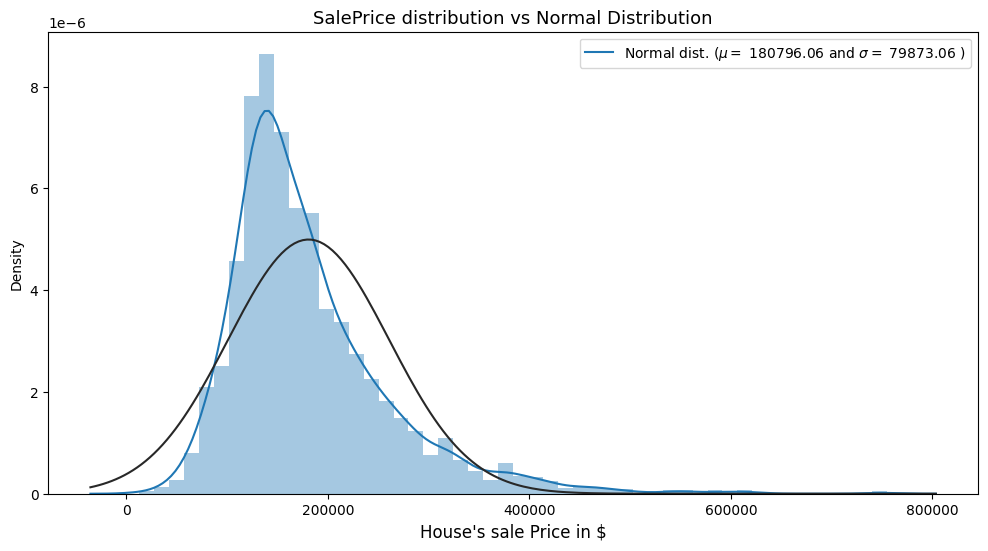

In [11]:
(mu, sigma) = norm.fit(data_w['SalePrice'])

plt.figure(figsize = (12,6))
sns.distplot(data_w['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

**Skew and kurt**

In [12]:
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['SalePrice'])

print("Skewness: %f" % abs(data_w['SalePrice']).skew())
print("Kurtosis: %f" % abs(data_w['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.743500
Kurtosis: 5.118900
Shapiro_Test: 0.876261
Shapiro_Test: 0.000000


**Correlation Matrix**

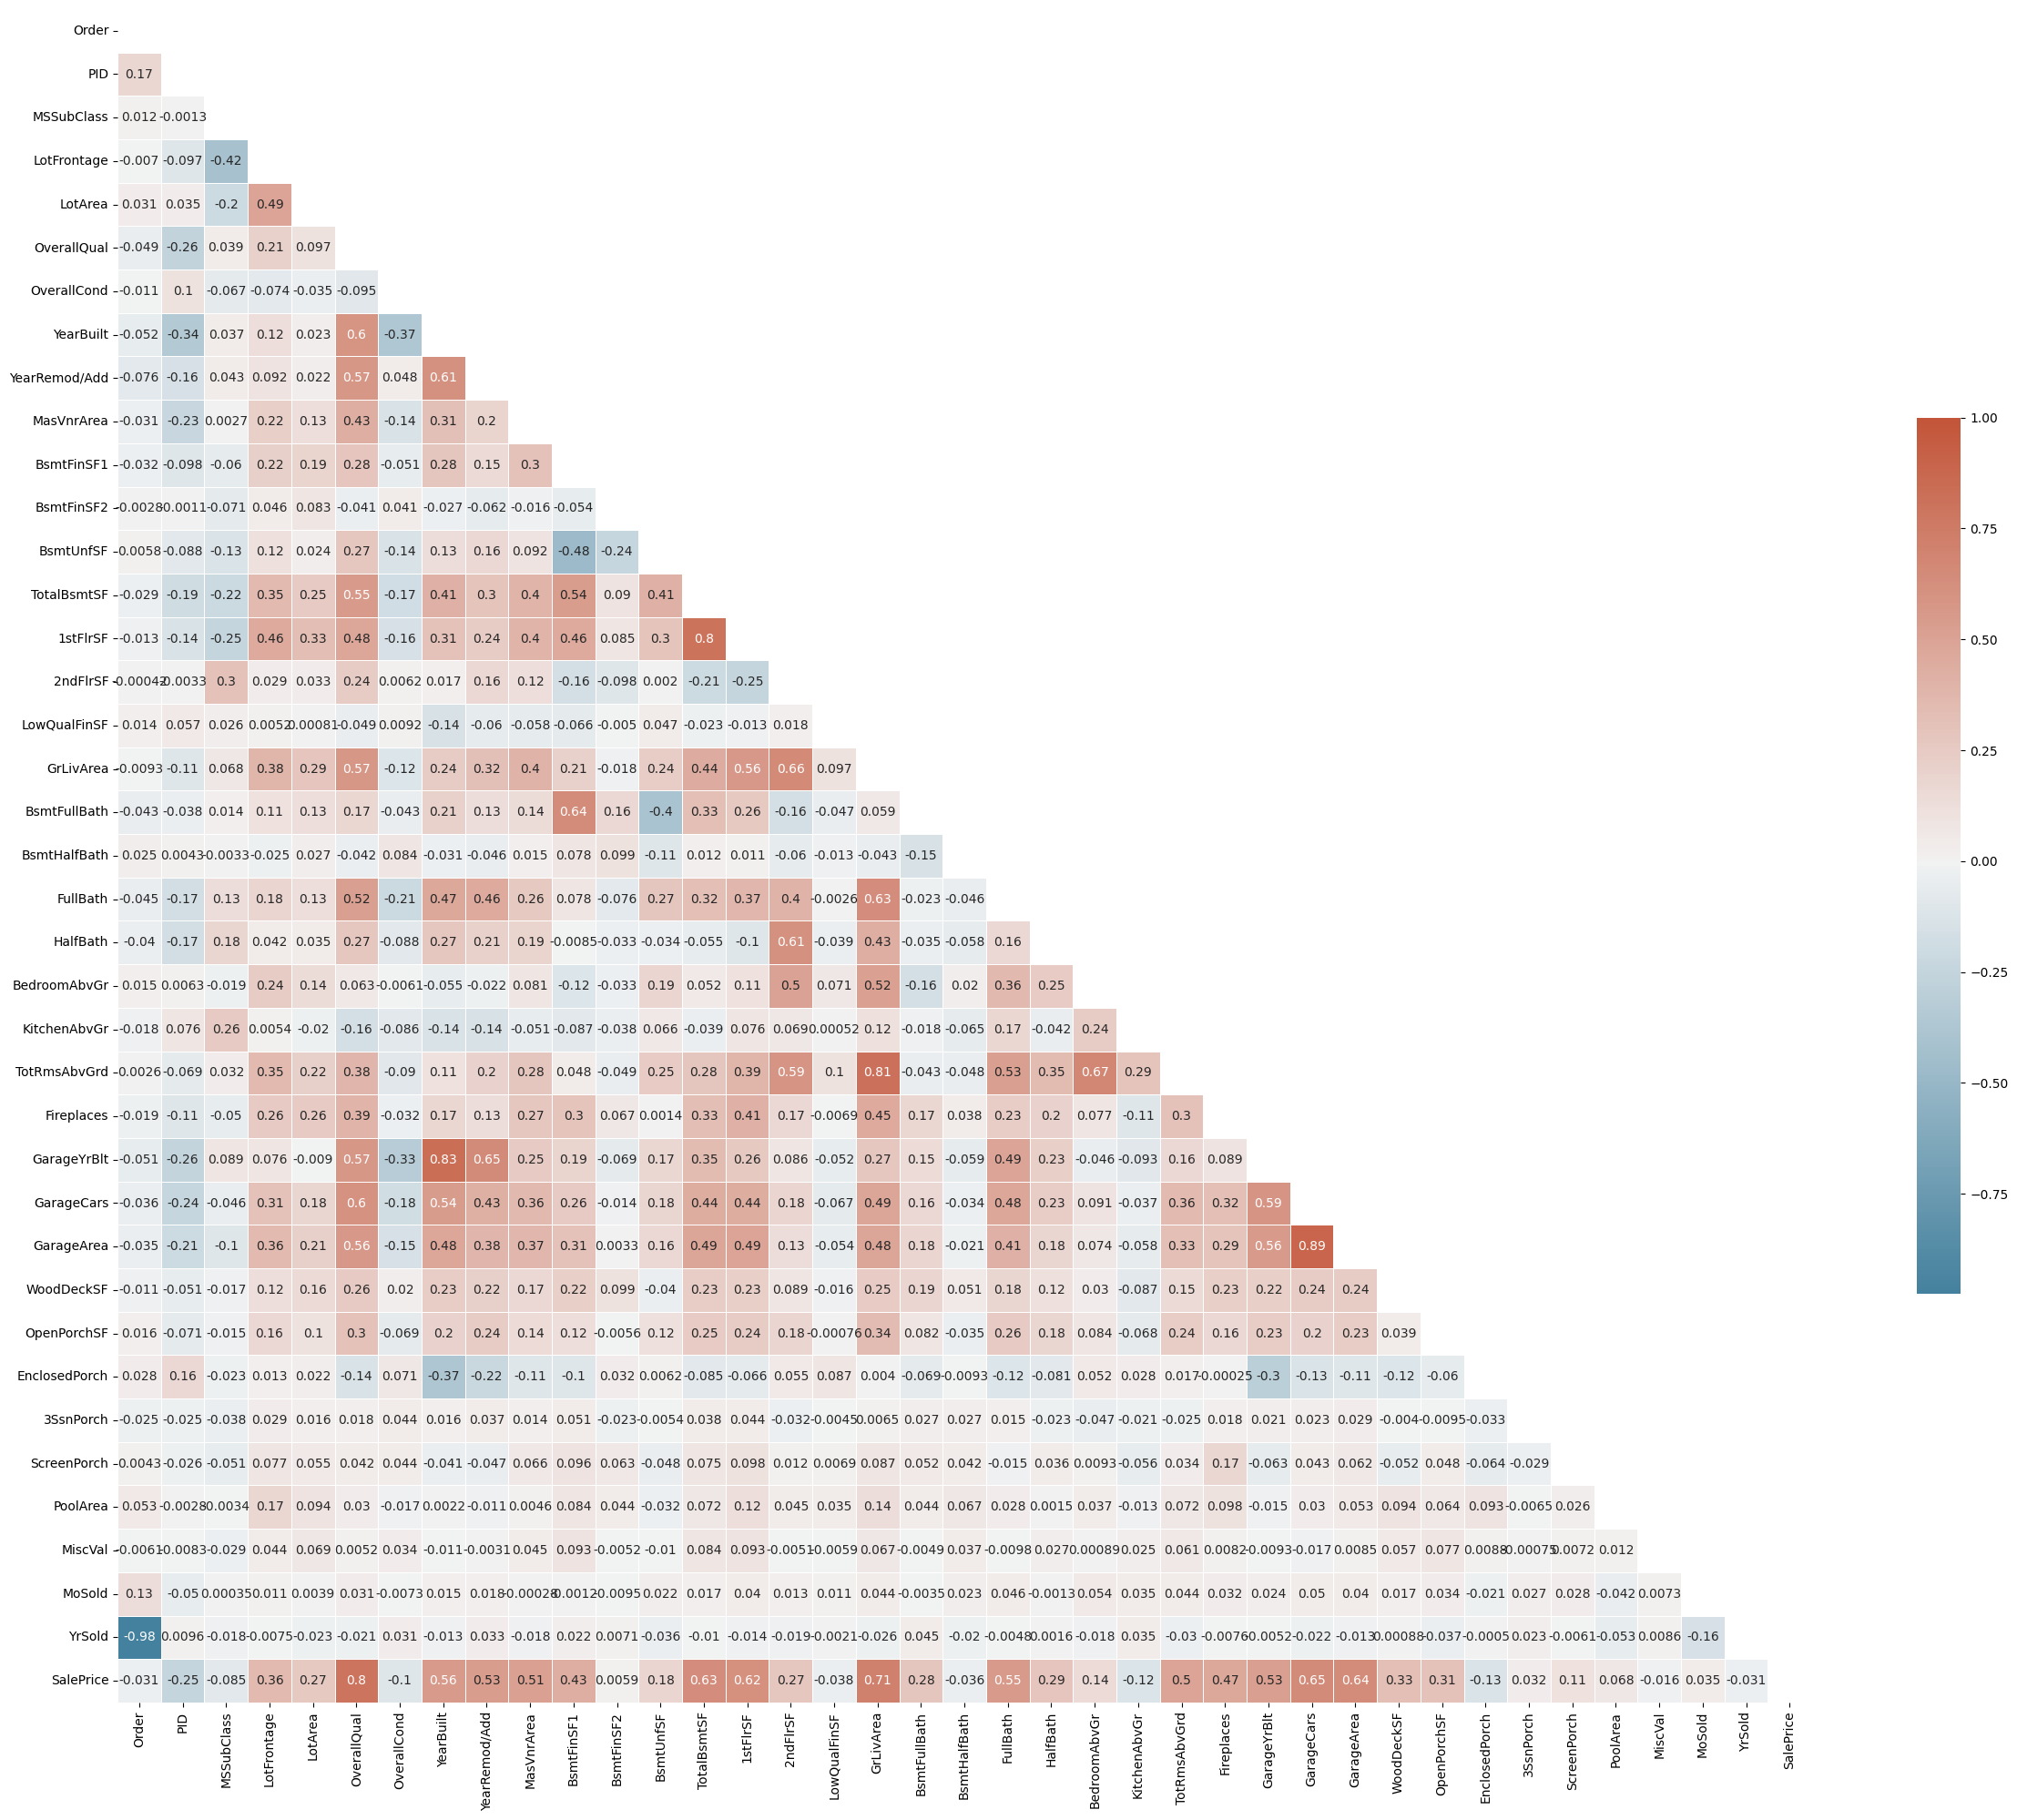

In [13]:
f, ax = plt.subplots(figsize=(30, 25))
mat = data_w.corr(method='pearson', numeric_only=True)
mask = np.triu(np.ones_like(mat, dtype=bool))

sns.heatmap(
    mat, mask=mask,
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    vmax=1, center=0, annot=True, square=True,
    linewidths=.5, cbar_kws={"shrink": .5}
)
plt.show()

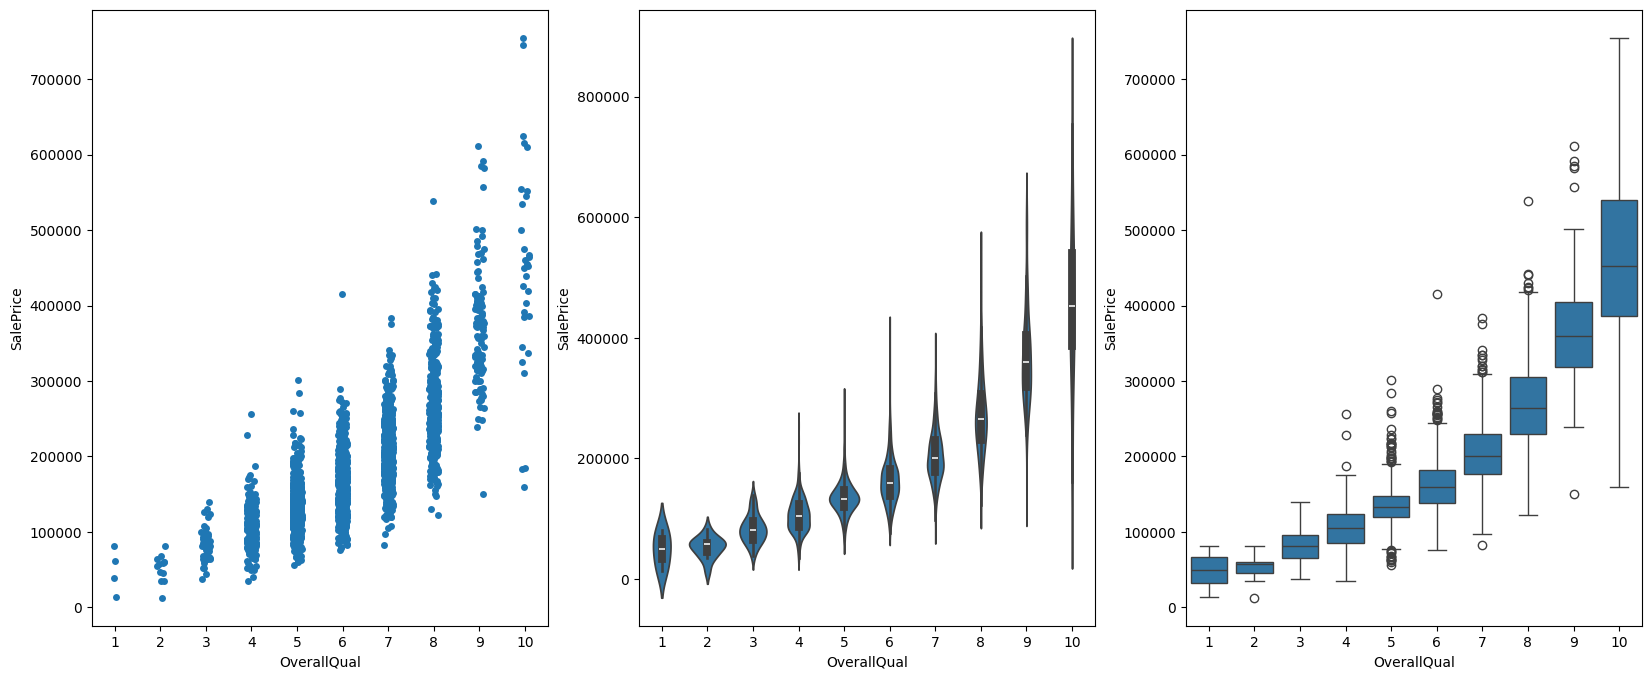

In [14]:
# OverallQuall - SalePrice [Pearson = 0.8]

figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.show()

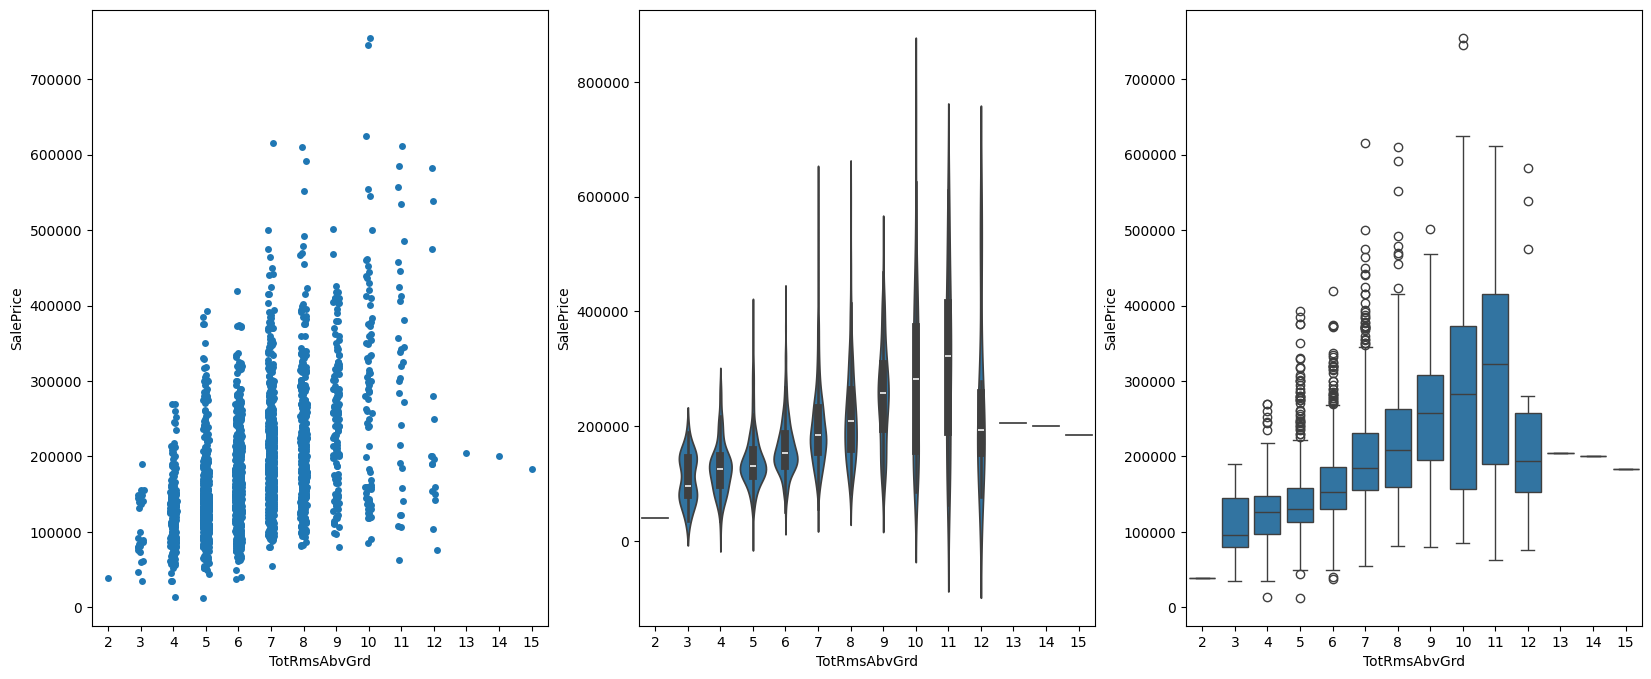

In [15]:
# TotRmsAbvGrd - SalePrice [Pearson = 0.50]

figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data_w, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[0])
sns.violinplot(data=data_w, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1])
sns.boxplot(data=data_w, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[2])
plt.show()

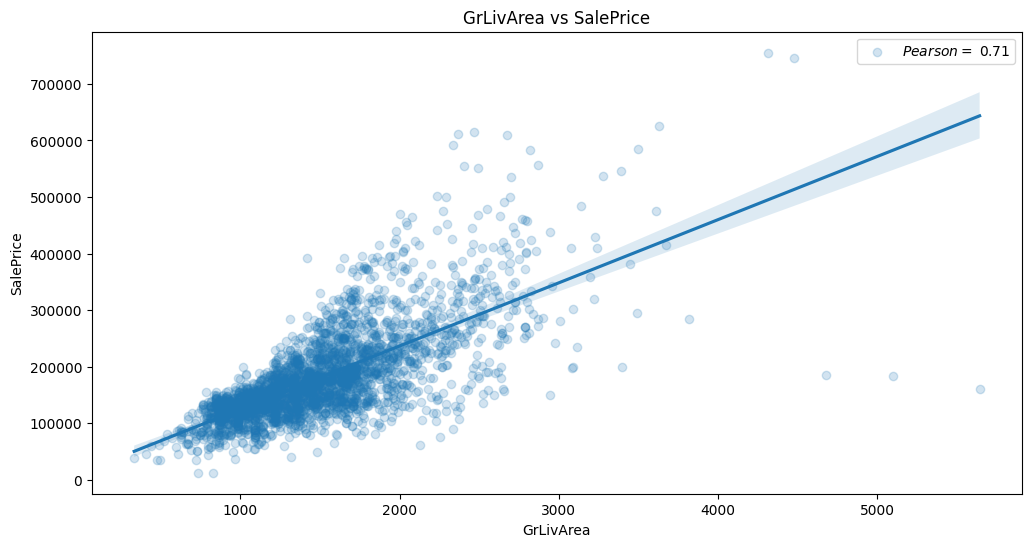

In [16]:
# GrLivArea vs SalePrice [corr = 0.71]

Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=data_w, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

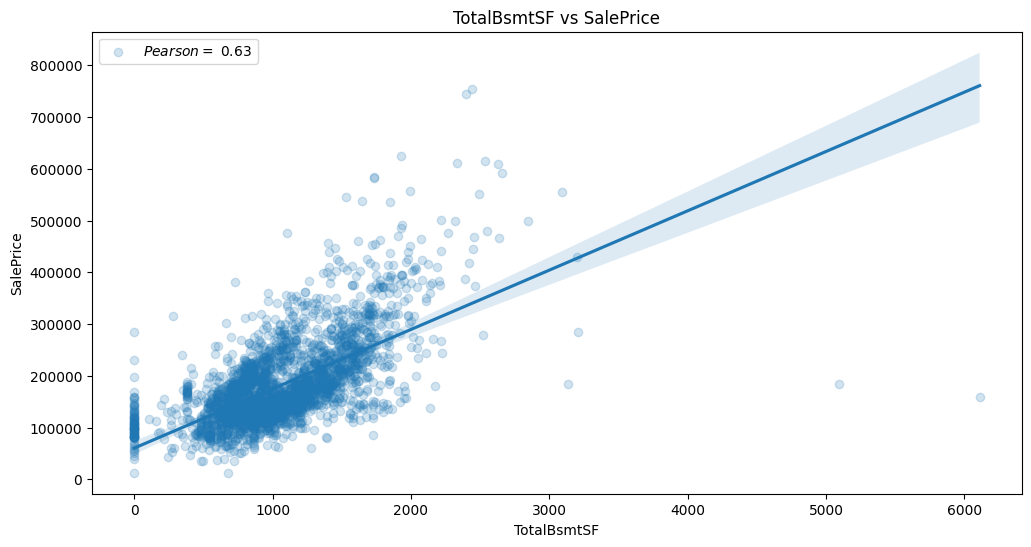

In [17]:
Pearson_TBSF = 0.63
plt.figure(figsize = (12,6))
sns.regplot(data=data_w, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

**YearBuilt vs SalePrice**

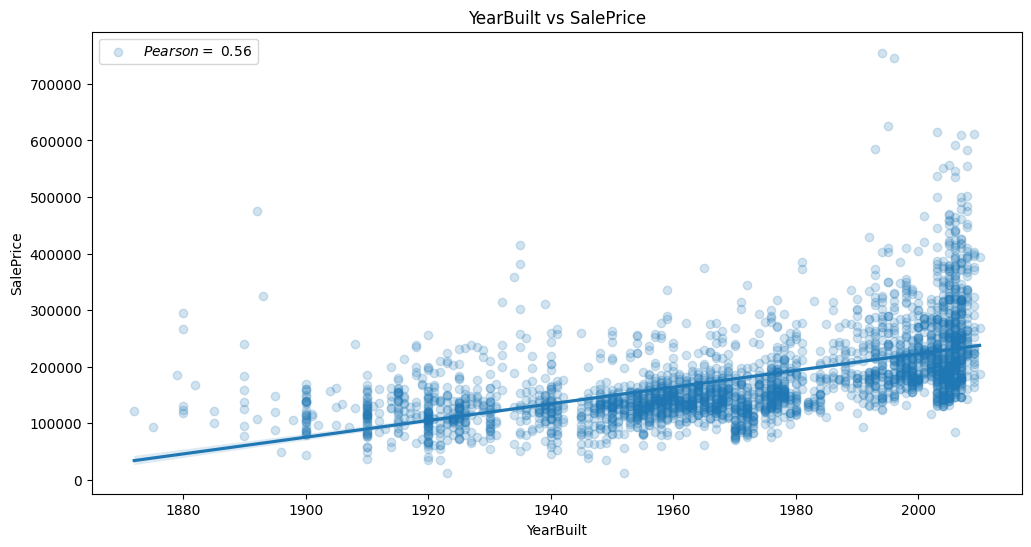

In [18]:
Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=data_w, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

**Median of Sale Price by Year**

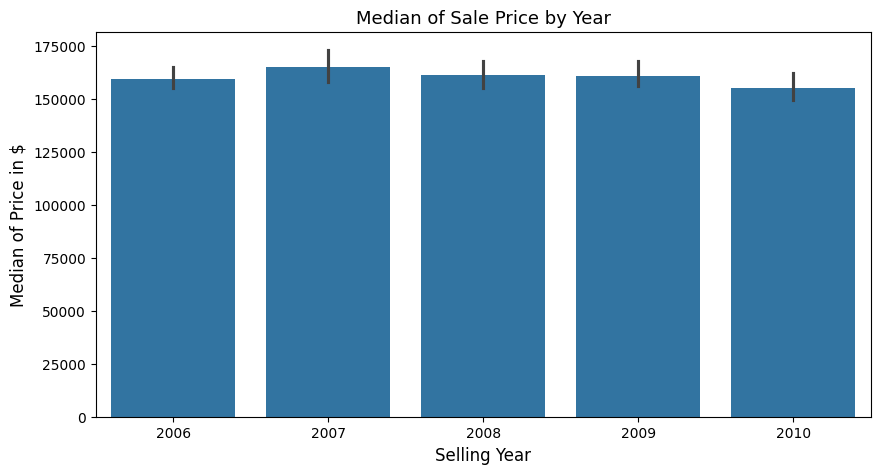

In [19]:
plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = data_w, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

**Separating Target and Features**

In [20]:
target = data_w['SalePrice']
test_id = test['Id']
test = test.drop(['Id'],axis = 1)
data_w2 = data_w.drop(['SalePrice','Order','PID'], axis = 1)

**Concatenating train & test set**

In [ ]:
train_test = pd.concat([data_w2,test], axis=0, sort=False)

**Looking at NaN % within the data**

In [21]:
nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan

NaN_sum           feat     Perc(%) Usability
Exterior2nd          1    Exterior2nd    0.068493      Keep
Exterior1st          1    Exterior1st    0.068493      Keep
KitchenQual          1    KitchenQual    0.068493      Keep
Electrical           1     Electrical    0.068493      Keep
SaleType             1       SaleType    0.068493      Keep
BsmtFinSF1           2     BsmtFinSF1    0.136986      Keep
Utilities            2      Utilities    0.136986      Keep
TotalBsmtSF          2    TotalBsmtSF    0.136986      Keep
BsmtUnfSF            2      BsmtUnfSF    0.136986      Keep
GarageArea           2     GarageArea    0.136986      Keep
GarageCars           2     GarageCars    0.136986      Keep
Functional           2     Functional    0.136986      Keep
BsmtFinSF2           2     BsmtFinSF2    0.136986      Keep
BsmtFullBath         4   BsmtFullBath    0.273973      Keep
BsmtHalfBath         4   BsmtHalfBath    0.273973      Keep
MSZoning             4       MSZoning    0.273973      Keep
MasVnrArea          38     MasVnrArea    2.602740      Keep
BsmtFinType1       122   BsmtFinType1    8.356164      Keep
BsmtFinType2       123   BsmtFinType2    8.424658      Keep
BsmtQual           124       BsmtQual    8.493151      Keep
BsmtCond           125       BsmtCond    8.561644      Keep
BsmtExposure       127   BsmtExposure    8.698630      Keep
GarageType         233     GarageType   15.958904      Keep
GarageFinish       237   GarageFinish   16.232877      Keep
GarageCond         237     GarageCond   16.232877      Keep
GarageQual         237     GarageQual   16.232877      Keep
GarageYrBlt        237    GarageYrBlt   16.232877      Keep
LotFrontage        717    LotFrontage   49.109589   Discard
YearRemod/Add     1459  YearRemod/Add   99.931507   Discard
FireplaceQu       2152    FireplaceQu  147.397260   Discard
MasVnrType        2669     MasVnrType  182.808219   Discard
YearRemodAdd      2930   YearRemodAdd  200.684932   Discard
Fence             3527          Fence  241.575342   Discard
Alley             4084          Alley  279.726027   Discard
MiscFeature       4232    MiscFeature  289.863014   Discard
PoolQC            4373         PoolQC  299.520548   Discard

**Plotting Nan**

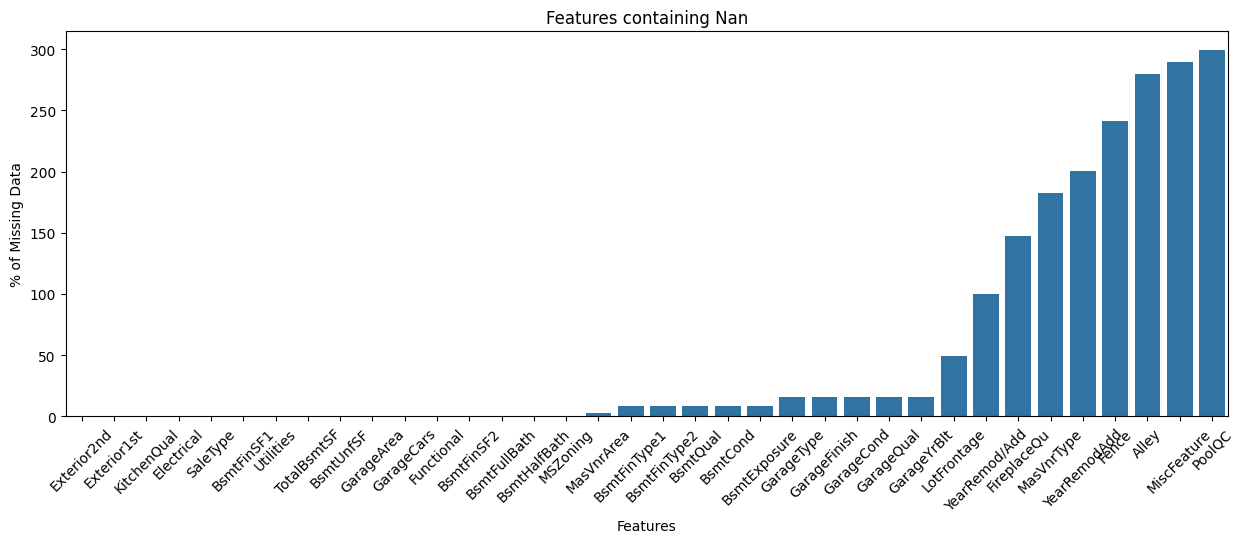

In [22]:
plt.figure(figsize = (15,5))
sns.barplot(x = nan['feat'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

**Converting non-numeric predictors stored as numbers into string**

In [ ]:
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

**Filling Categorical NaN (That we know how to fill due to the description file )**

In [23]:
train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna("None")
train_test['Fence'] = train_test['Fence'].fillna("None")
train_test['MiscFeature'] = train_test['MiscFeature'].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')

    # Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

0    RL
0    RH
Name: MSZoning, dtype: object
0    141.0
0     80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    1960.0
0       NaN
Name: YearRemod/Add, dtype: float64
0    Stone
0      NaN
Name: MasVnrType, dtype: object
0    112.0
0      0.0
Name: MasVnrArea, dtype: float64
0    639.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    441.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    1080.0
0     882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    1960.0
0    1961.0
Name: GarageYrBlt, dtype: float64
0       NaN
0    1961.0
Name: YearRemodAdd, dtype: float64


**Removing the useless variables**

In [ ]:
useless = ['GarageYrBlt','YearRemodAdd']
train_test = train_test.drop(useless, axis = 1)

**Imputing with KnnRegressor (we can also use different Imputers)**

In [24]:
def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ttn,ttc],axis=1)

train_test = impute_knn(train_test)


objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# # Checking NaN presence

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

In [25]:
# First part remains the same
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] + train_test["FullBath"] + train_test["HalfBath"] + train_test["KitchenAbvGr"])
train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']
train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) + train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))
train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

# Converting non-numeric predictors stored as numbers into string
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Creating dummy variables from categorical features
train_test_dummy = pd.get_dummies(train_test)

# Fetch all numeric features
# Filter to only include float and int columns (exclude bool columns)
numeric_features = train_test_dummy.select_dtypes(include=['float64', 'int64']).columns

# Compute skewness only on non-boolean numeric features
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

**SalePrice before transformation**

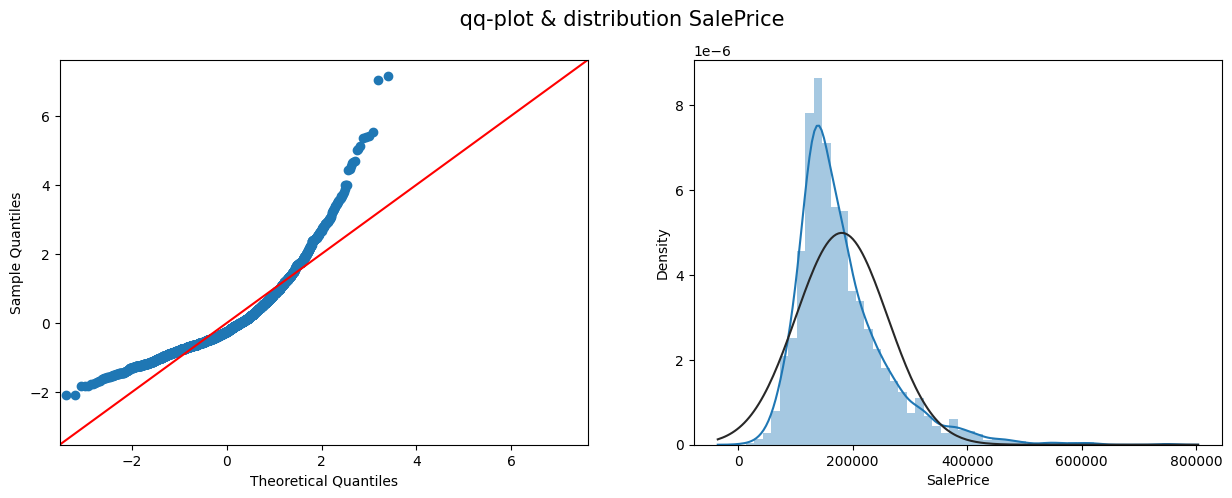

In [26]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

**SalePrice after transformation**

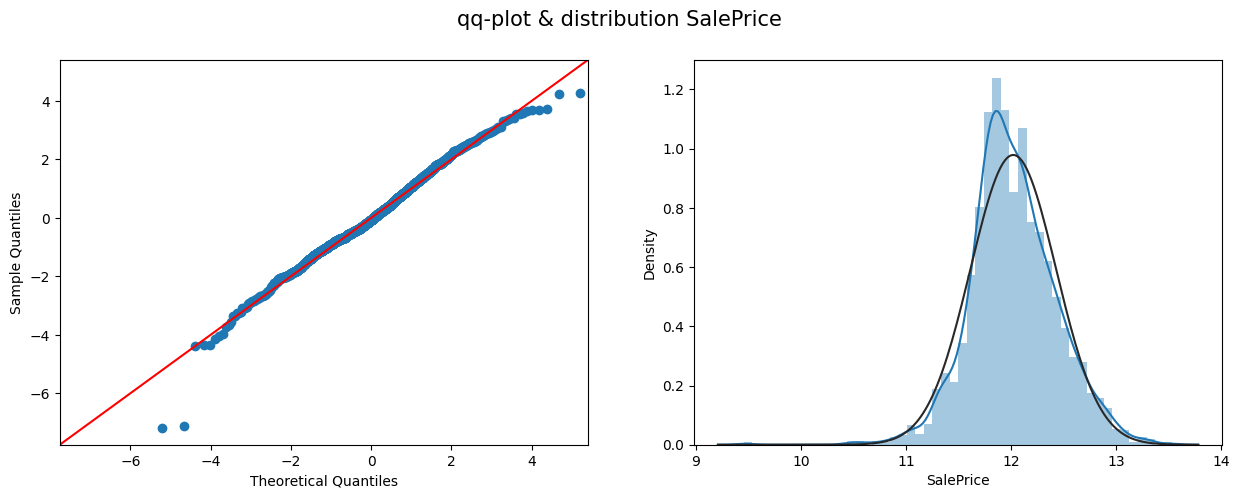

In [27]:
target_log = np.log1p(target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

In [30]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [31]:
# Train-Test separation

train = train_test_dummy[0:2930]
test = train_test_dummy[2930:]
test['Id'] = test_id

# Creation of the RMSE metric:

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

**5 Fold Cross validation**

In [32]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

Streaming output truncated to the last 5000 lines.
4:	learn: 0.3318161	total: 153ms	remaining: 30.4s
5:	learn: 0.3191656	total: 161ms	remaining: 26.7s
6:	learn: 0.3070230	total: 170ms	remaining: 24.1s
7:	learn: 0.2959121	total: 178ms	remaining: 22.1s
8:	learn: 0.2854602	total: 199ms	remaining: 21.9s
9:	learn: 0.2747192	total: 207ms	remaining: 20.5s
10:	learn: 0.2643669	total: 215ms	remaining: 19.4s
11:	learn: 0.2548369	total: 224ms	remaining: 18.4s
12:	learn: 0.2460259	total: 232ms	remaining: 17.6s
13:	learn: 0.2377014	total: 241ms	remaining: 16.9s
14:	learn: 0.2294760	total: 249ms	remaining: 16.3s
15:	learn: 0.2212355	total: 257ms	remaining: 15.8s
16:	learn: 0.2138681	total: 266ms	remaining: 15.4s
17:	learn: 0.2068438	total: 274ms	remaining: 14.9s
18:	learn: 0.2002052	total: 282ms	remaining: 14.6s
19:	learn: 0.1938850	total: 290ms	remaining: 14.2s
20:	learn: 0.1879642	total: 298ms	remaining: 13.9s
21:	learn: 0.1818781	total: 307ms	remaining: 13.6s
22:	learn: 0.1761235	total: 316ms	rem

In [33]:
final_cv_score

Regressors  RMSE_mean  RMSE_std
0          Linear_Reg.   0.139906  0.008774
1  Bayesian_Ridge_Reg.   0.122801  0.012918
2            LGBM_Reg.   0.125197  0.011304
3                  SVR   0.271176  0.014806
4        Dec_Tree_Reg.   0.202059  0.009835
5   Random_Forest_Reg.   0.137360  0.012072
6             XGB_Reg.   0.131961  0.011776
7      Grad_Boost_Reg.   0.125653  0.011558
8       Cat_Boost_Reg.   0.114826  0.015019
9         Stacked_Reg.   0.117172  0.015080

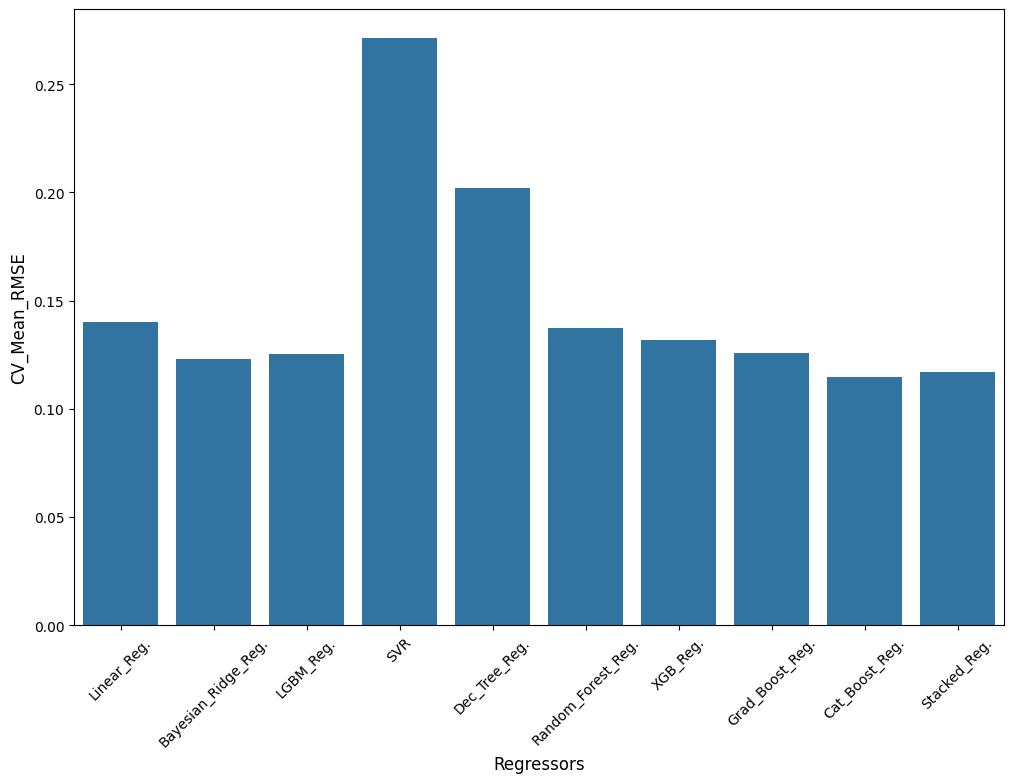

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Regressors', y='RMSE_mean', data=final_cv_score) # Pass data as a single argument
plt.xlabel('Regressors', fontsize=12)
plt.ylabel('CV_Mean_RMSE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [35]:
# Train-Test split the data

X_train,X_val,y_train,y_val = train_test_split(train,target_log,test_size = 0.1,random_state=42)

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [36]:
from google.colab import output
output.enable_custom_widget_manager()

In [38]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

np.float64(0.09606694133394218)

In [39]:
# Features' importance of the model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

Feature Id  Importances
0           OverallQual    17.691018
1             GrLivArea     7.565579
2    Total_Home_Quality     5.756266
3            HighQualSF     5.408964
4           TotalBsmtSF     4.852915
..                  ...          ...
349           PoolQC_TA     0.000000
350          Fence_MnWw     0.000000
351    MiscFeature_TenC     0.000000
352        SaleType_CWD     0.000000
353         SaleType_WD     0.000000

[354 rows x 2 columns]

In [40]:
# Catboost default paramters

cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learn

**Final Cat-Boost Regressor**

In [41]:
params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}

cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [42]:
from google.colab import output
output.enable_custom_widget_manager()

In [43]:
catf_score

np.float64(0.09374803967678327)